In [1]:
import numpy as np
import pandas as pd
import nltk
import pickle
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline

In [2]:
df = pd.read_pickle('df_clean.pkl')

In [3]:
df = df[['rating','lemmatized']]

In [4]:
df

,rating,lemmatized
0,5.0,"[customer, service/call, centre, mainly, tech,..."
1,5.0,"[customer, service/call, centre, mainly, tech,..."
2,4.0,"[management, great, culture, awesome, people, ..."
3,2.0,"[work, culture, change, lot, politics, managem..."
4,3.0,"[typical, day, work, company, fast, pace, alwa..."
...,...,...
4137,5.0,"[truly, great, place, work, chef, awesome, guy..."
4138,5.0,"[glad, today, login, herei, like, muchit, ver,..."
4139,3.0,"[google, shouldnt, participate, project, drago..."
4140,5.0,"[google, awesome, place, work, hour, pretty, t..."


In [5]:
df['lemma_str']=[' '.join(map(str,l)) for l in df['lemmatized']]

In [6]:
df['sentiment']=df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [7]:
df

,rating,lemmatized,lemma_str,sentiment
0,5.0,"[customer, service/call, centre, mainly, tech,...",customer service/call centre mainly tech suppo...,0.322222
1,5.0,"[customer, service/call, centre, mainly, tech,...",customer service/call centre mainly tech suppo...,0.322222
2,4.0,"[management, great, culture, awesome, people, ...",management great culture awesome people young ...,0.539394
3,2.0,"[work, culture, change, lot, politics, managem...",work culture change lot politics management un...,0.000000
4,3.0,"[typical, day, work, company, fast, pace, alwa...",typical day work company fast pace always diff...,0.042424
...,...,...,...,...
4137,5.0,"[truly, great, place, work, chef, awesome, guy...",truly great place work chef awesome guy google...,0.866667
4138,5.0,"[glad, today, login, herei, like, muchit, ver,...",glad today login herei like muchit ver goodi h...,0.600000
4139,3.0,"[google, shouldnt, participate, project, drago...",google shouldnt participate project dragonfly ...,0.000000
4140,5.0,"[google, awesome, place, work, hour, pretty, t...",google awesome place work hour pretty typical ...,0.122222


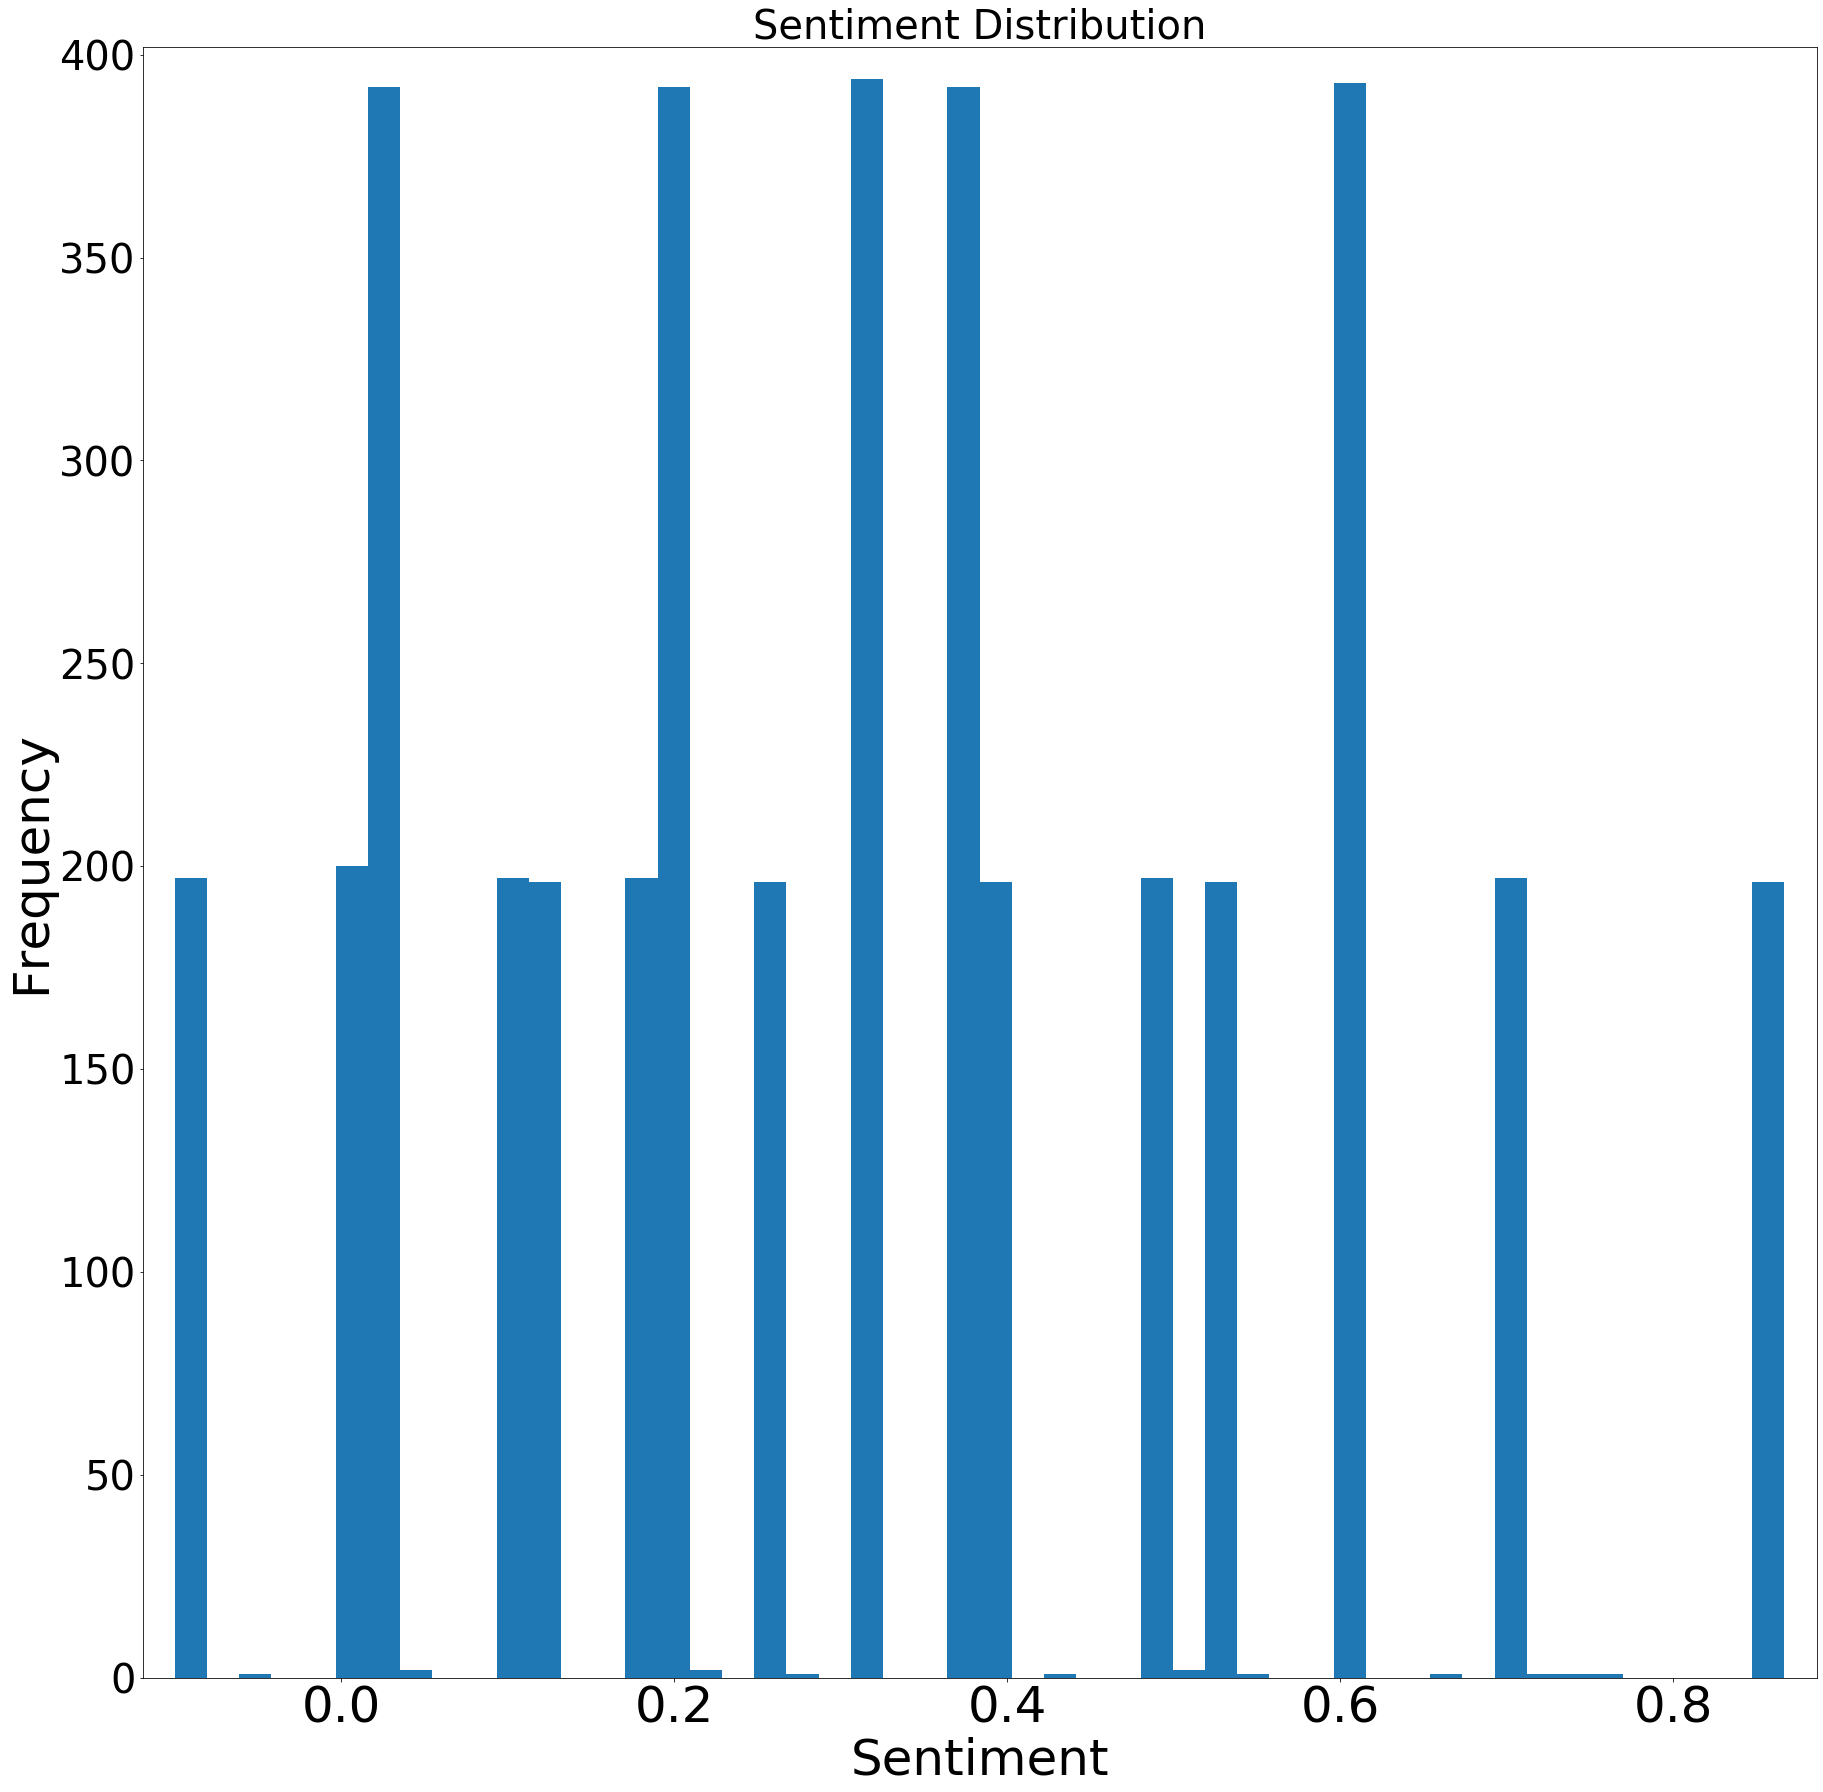

In [8]:
plt.figure(figsize=(30,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment'],bins=50)
plt.title('Sentiment Distribution', fontsize=40)
plt.show()

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text yticklabel objects>)

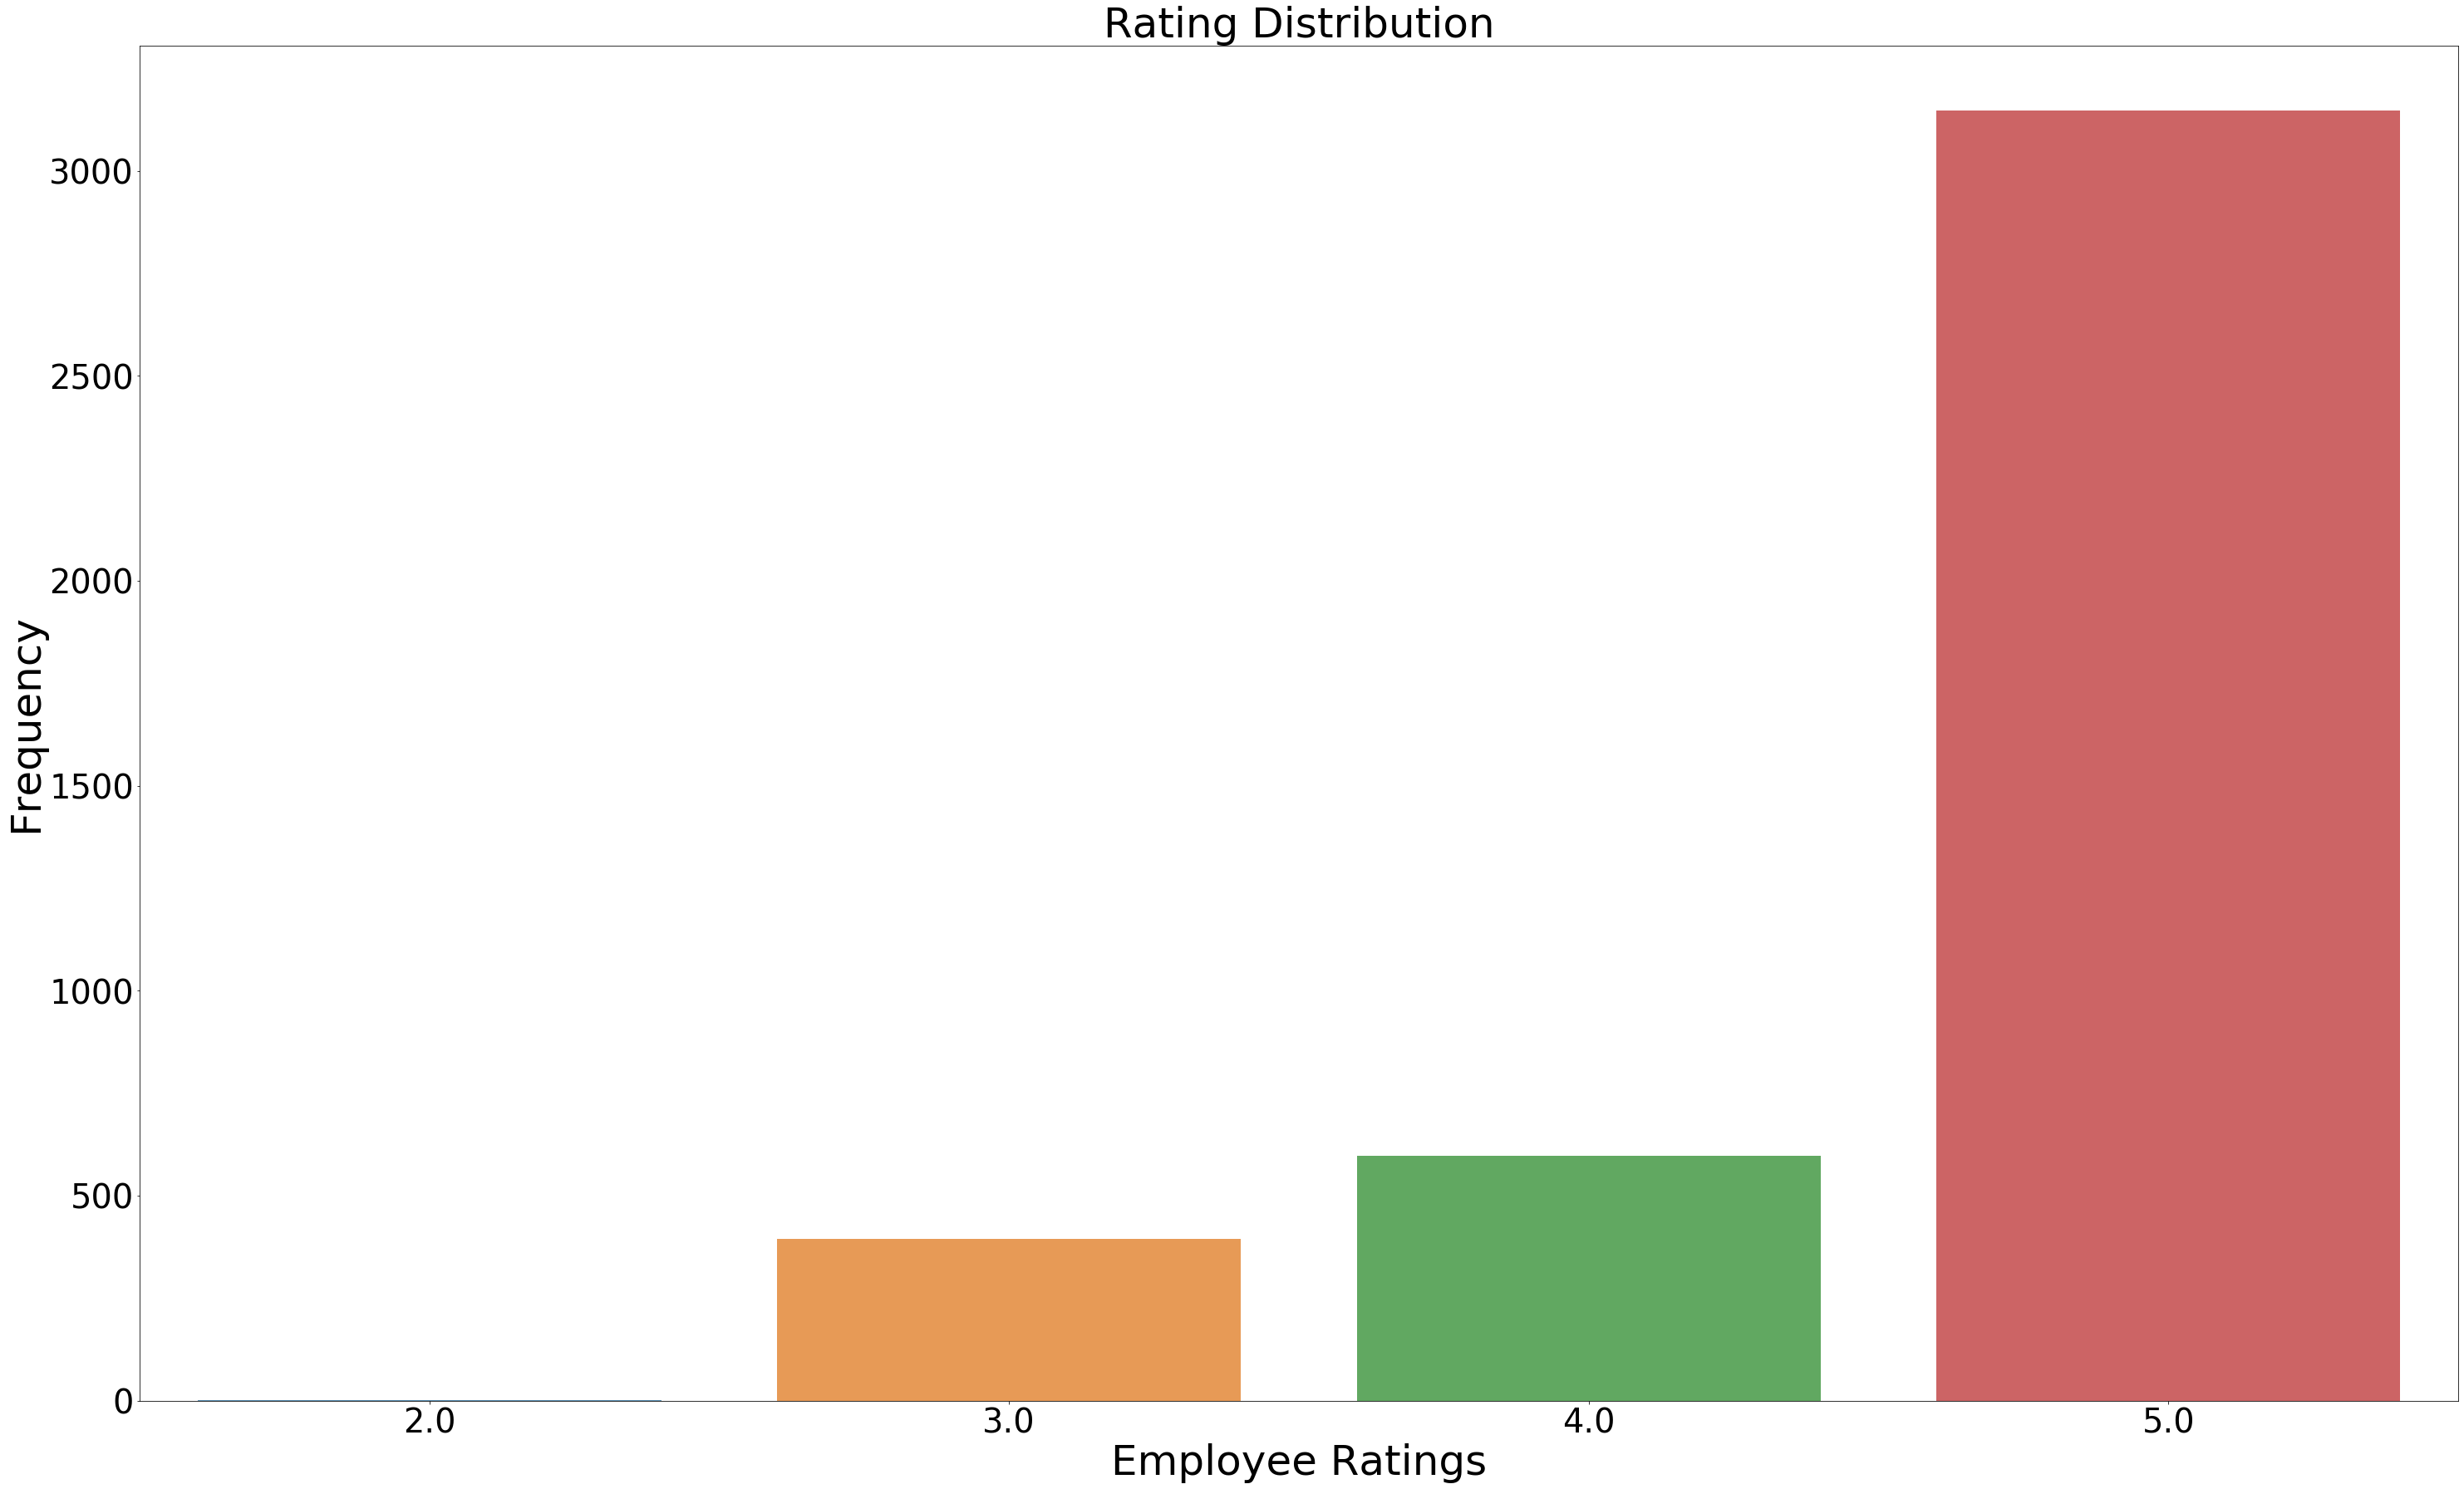

In [9]:
x=df.rating.value_counts()
y=x.sort_index(axis=0)
plt.figure(figsize=(50,30))
sns.barplot(x.index,x.values,alpha=0.8)
plt.title('Rating Distribution',fontsize=50)
plt.xlabel('Employee Ratings',fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency',fontsize=50)
plt.yticks(fontsize=40)

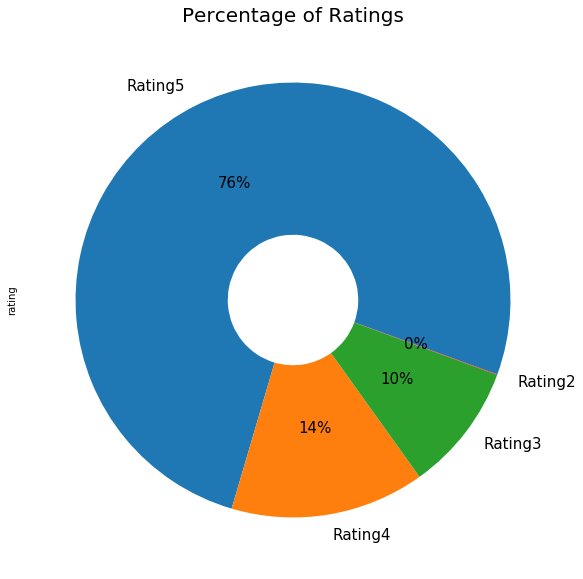

In [10]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Ratings',fontsize=20)
df.rating.value_counts().plot(kind='pie',labels=['Rating5','Rating4','Rating3','Rating2','Rating1'],
                             wedgeprops=dict(width=.7),autopct='%1.0f%%',startangle=-20,
                             textprops={'fontsize':15})

In [11]:
df['review_len'] =df['lemmatized'].astype(str).apply(len)
df['word_count'] =df['lemmatized'].apply(lambda x:len(str(x).split()))

In [12]:
df

,rating,lemmatized,lemma_str,sentiment,review_len,word_count
0,5.0,"[customer, service/call, centre, mainly, tech,...",customer service/call centre mainly tech suppo...,0.322222,127,12
1,5.0,"[customer, service/call, centre, mainly, tech,...",customer service/call centre mainly tech suppo...,0.322222,127,12
2,4.0,"[management, great, culture, awesome, people, ...",management great culture awesome people young ...,0.539394,188,20
3,2.0,"[work, culture, change, lot, politics, managem...",work culture change lot politics management un...,0.000000,134,13
4,3.0,"[typical, day, work, company, fast, pace, alwa...",typical day work company fast pace always diff...,0.042424,147,16
...,...,...,...,...,...,...
4137,5.0,"[truly, great, place, work, chef, awesome, guy...",truly great place work chef awesome guy google...,0.866667,157,17
4138,5.0,"[glad, today, login, herei, like, muchit, ver,...",glad today login herei like muchit ver goodi h...,0.600000,123,14
4139,3.0,"[google, shouldnt, participate, project, drago...",google shouldnt participate project dragonfly ...,0.000000,172,16
4140,5.0,"[google, awesome, place, work, hour, pretty, t...",google awesome place work hour pretty typical ...,0.122222,208,23


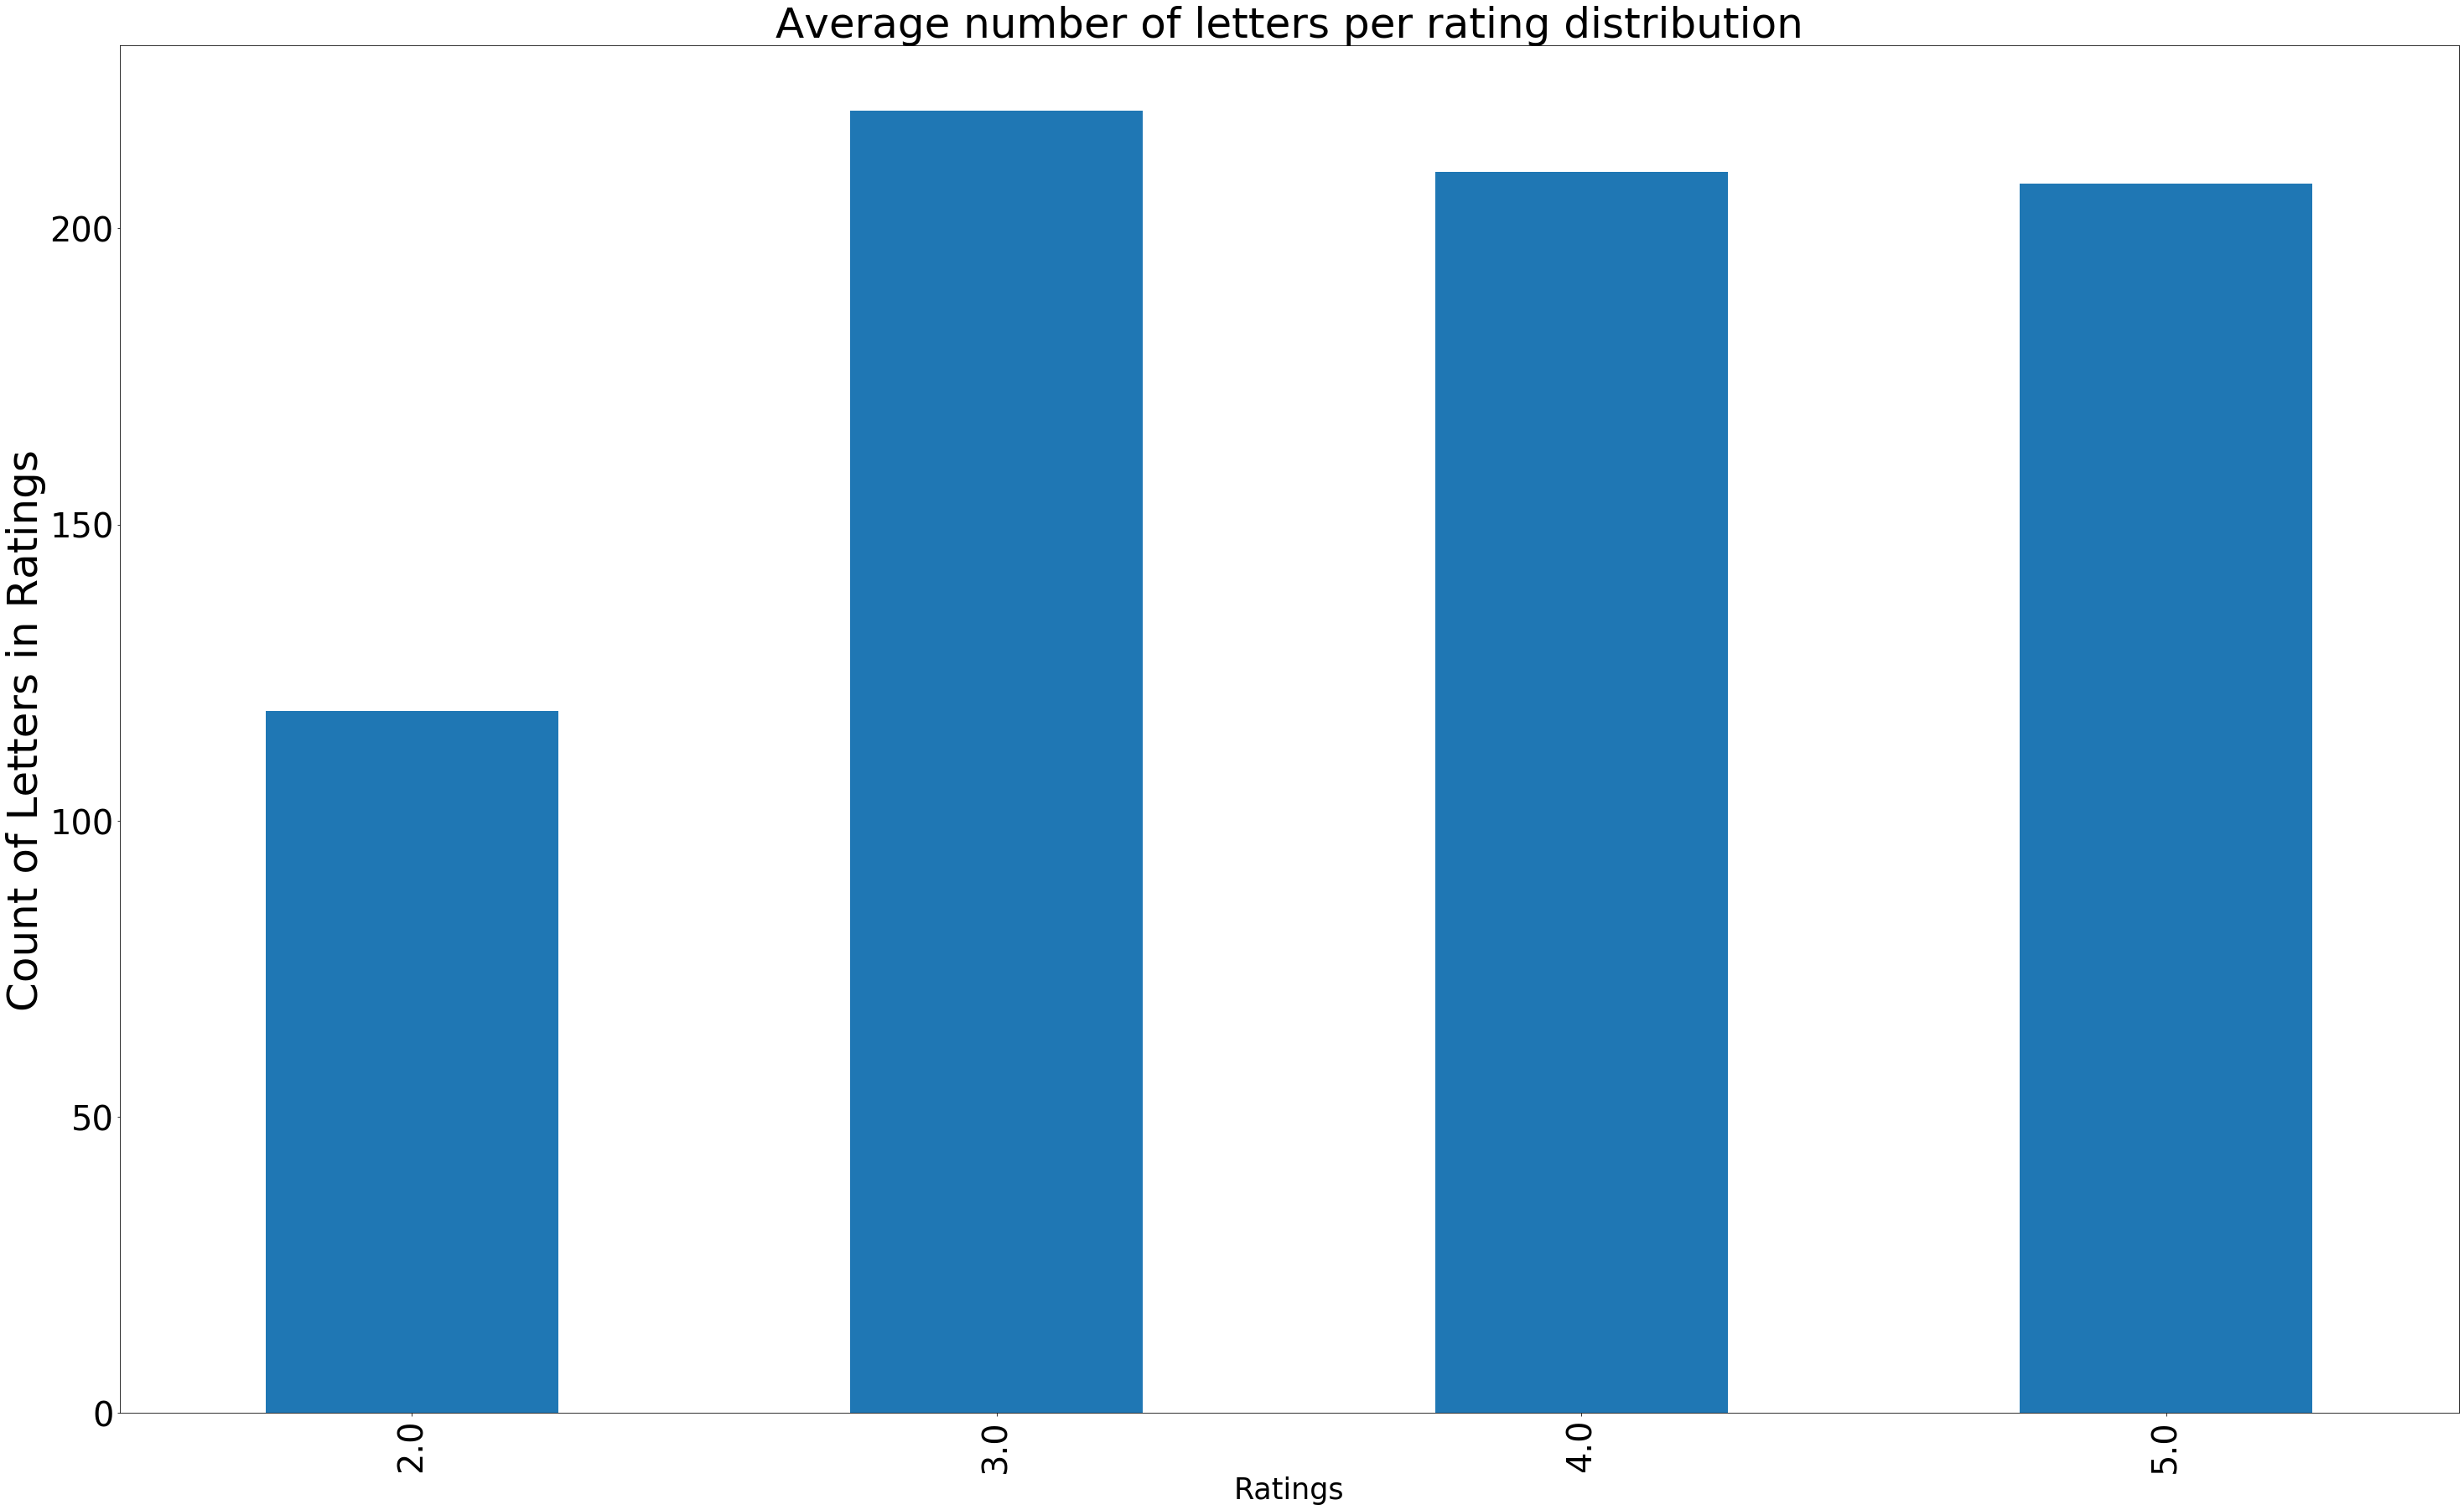

In [13]:
letter_avg=df.groupby('rating')['review_len'].mean().plot(kind='bar',figsize=(50,30))
plt.title('Average number of letters per rating distribution',fontsize=50)
plt.xlabel('Ratings',fontsize=35)
plt.xticks(fontsize=40)
plt.ylabel('Count of Letters in Ratings',fontsize=50)
plt.yticks(fontsize=40)
plt.show()

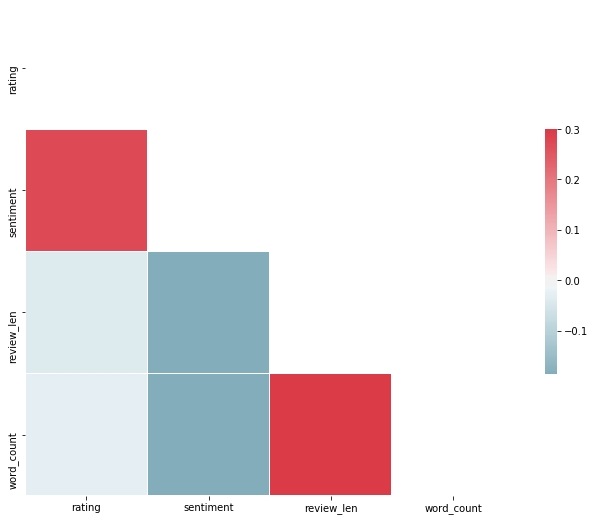

In [14]:
correlation=df[['rating', 'sentiment', 'review_len', 'word_count']].corr()
#mask=np.zeros_like(correlation,dtype=np.bool)
#mask[np.triu_indices_from(mask)]=True
mask = np.triu(np.ones_like(correlation, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#plt.figure(figsize=(50,30))
#plt.xticks(fontsize=30)
#plt.yticks(fontsize=30)
sns.heatmap(correlation,cmap=cmap,vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},mask=mask)

In [15]:
words=df['lemmatized']
allwords=[]
for wordlist in words:
    allwords+= wordlist

In [16]:
print(allwords)

['customer', 'service/call', 'centre', 'mainly', 'tech', 'support', 'great', 'learning', 'different', 'apps', 'come', 'market', 'customer', 'service/call', 'centre', 'mainly', 'tech', 'support', 'great', 'learning', 'different', 'apps', 'come', 'market', 'management', 'great', 'culture', 'awesome', 'people', 'young', 'motivate', 'also', 'share', 'best', 'practice', 'con', 'ive', 'talk', 'others', 'sell', 'adwords', 'live', 'make', 'much', 'work', 'culture', 'change', 'lot', 'politics', 'management', 'unwilling', 'step', 'resolve', 'issue', 'engineer', 'leave', 'burden', 'typical', 'day', 'work', 'company', 'fast', 'pace', 'always', 'different', 'thing', 'like', 'instal', 'new', 'phone', 'fix', 'client', 'support', 'great', 'company', 'work', 'excellenent', 'people', 'wonder', 'ful', 'work', 'environment', 'good', 'learning', 'environment', 'learn', 'great', 'skillsets', 'google', 'talented', 'skilled', 'caring', 'people', 'passion', 'province', 'company', 'grow', 'develop', 'people', '

In [17]:
mostcommon=FreqDist(allwords).most_common(100)

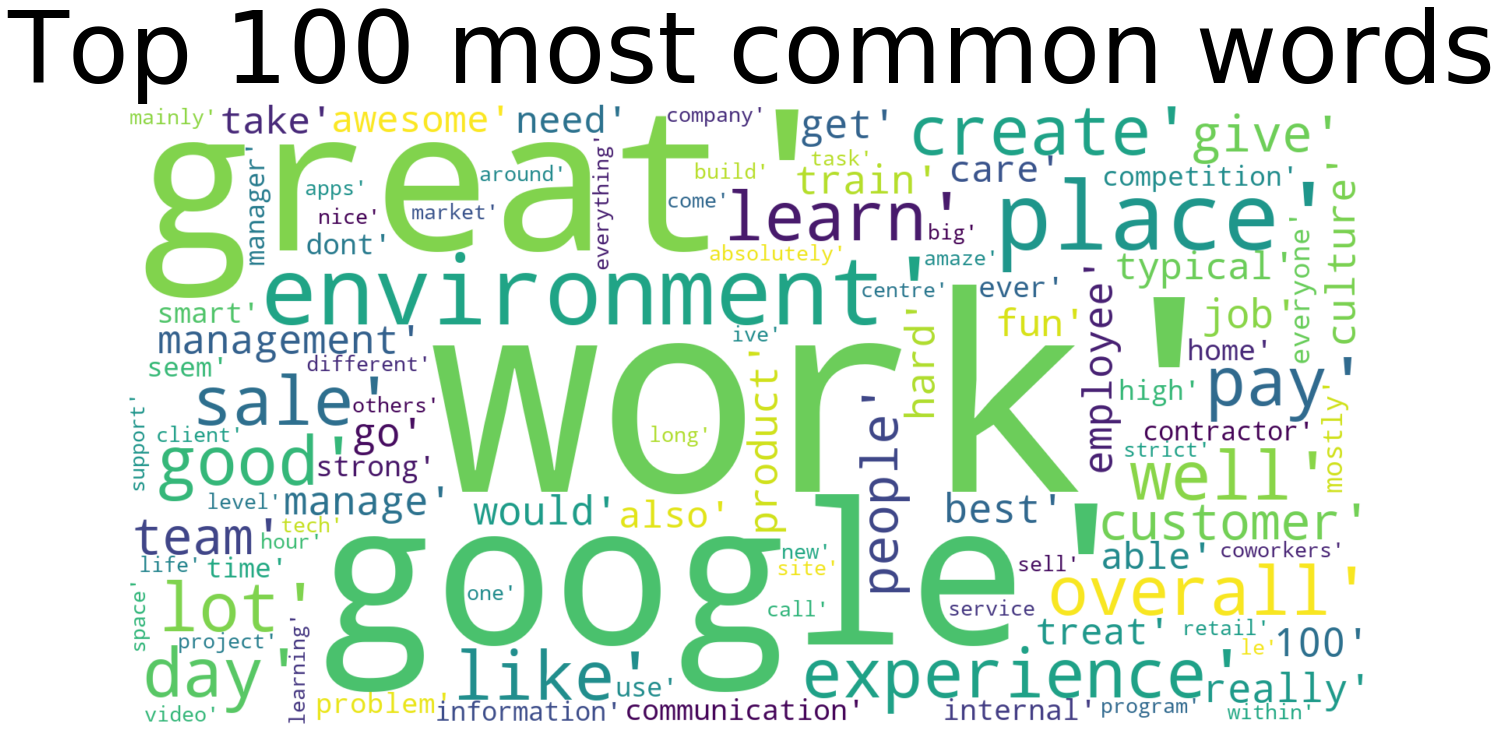

In [18]:
wordcloud=WordCloud(width=1600,height=800,background_color='white').generate(str(mostcommon))
fig=plt.figure(figsize=(30,10),facecolor='white')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 most common words', fontsize=100)

plt.tight_layout(pad=0)
plt.show()

# Imbalanced Classes

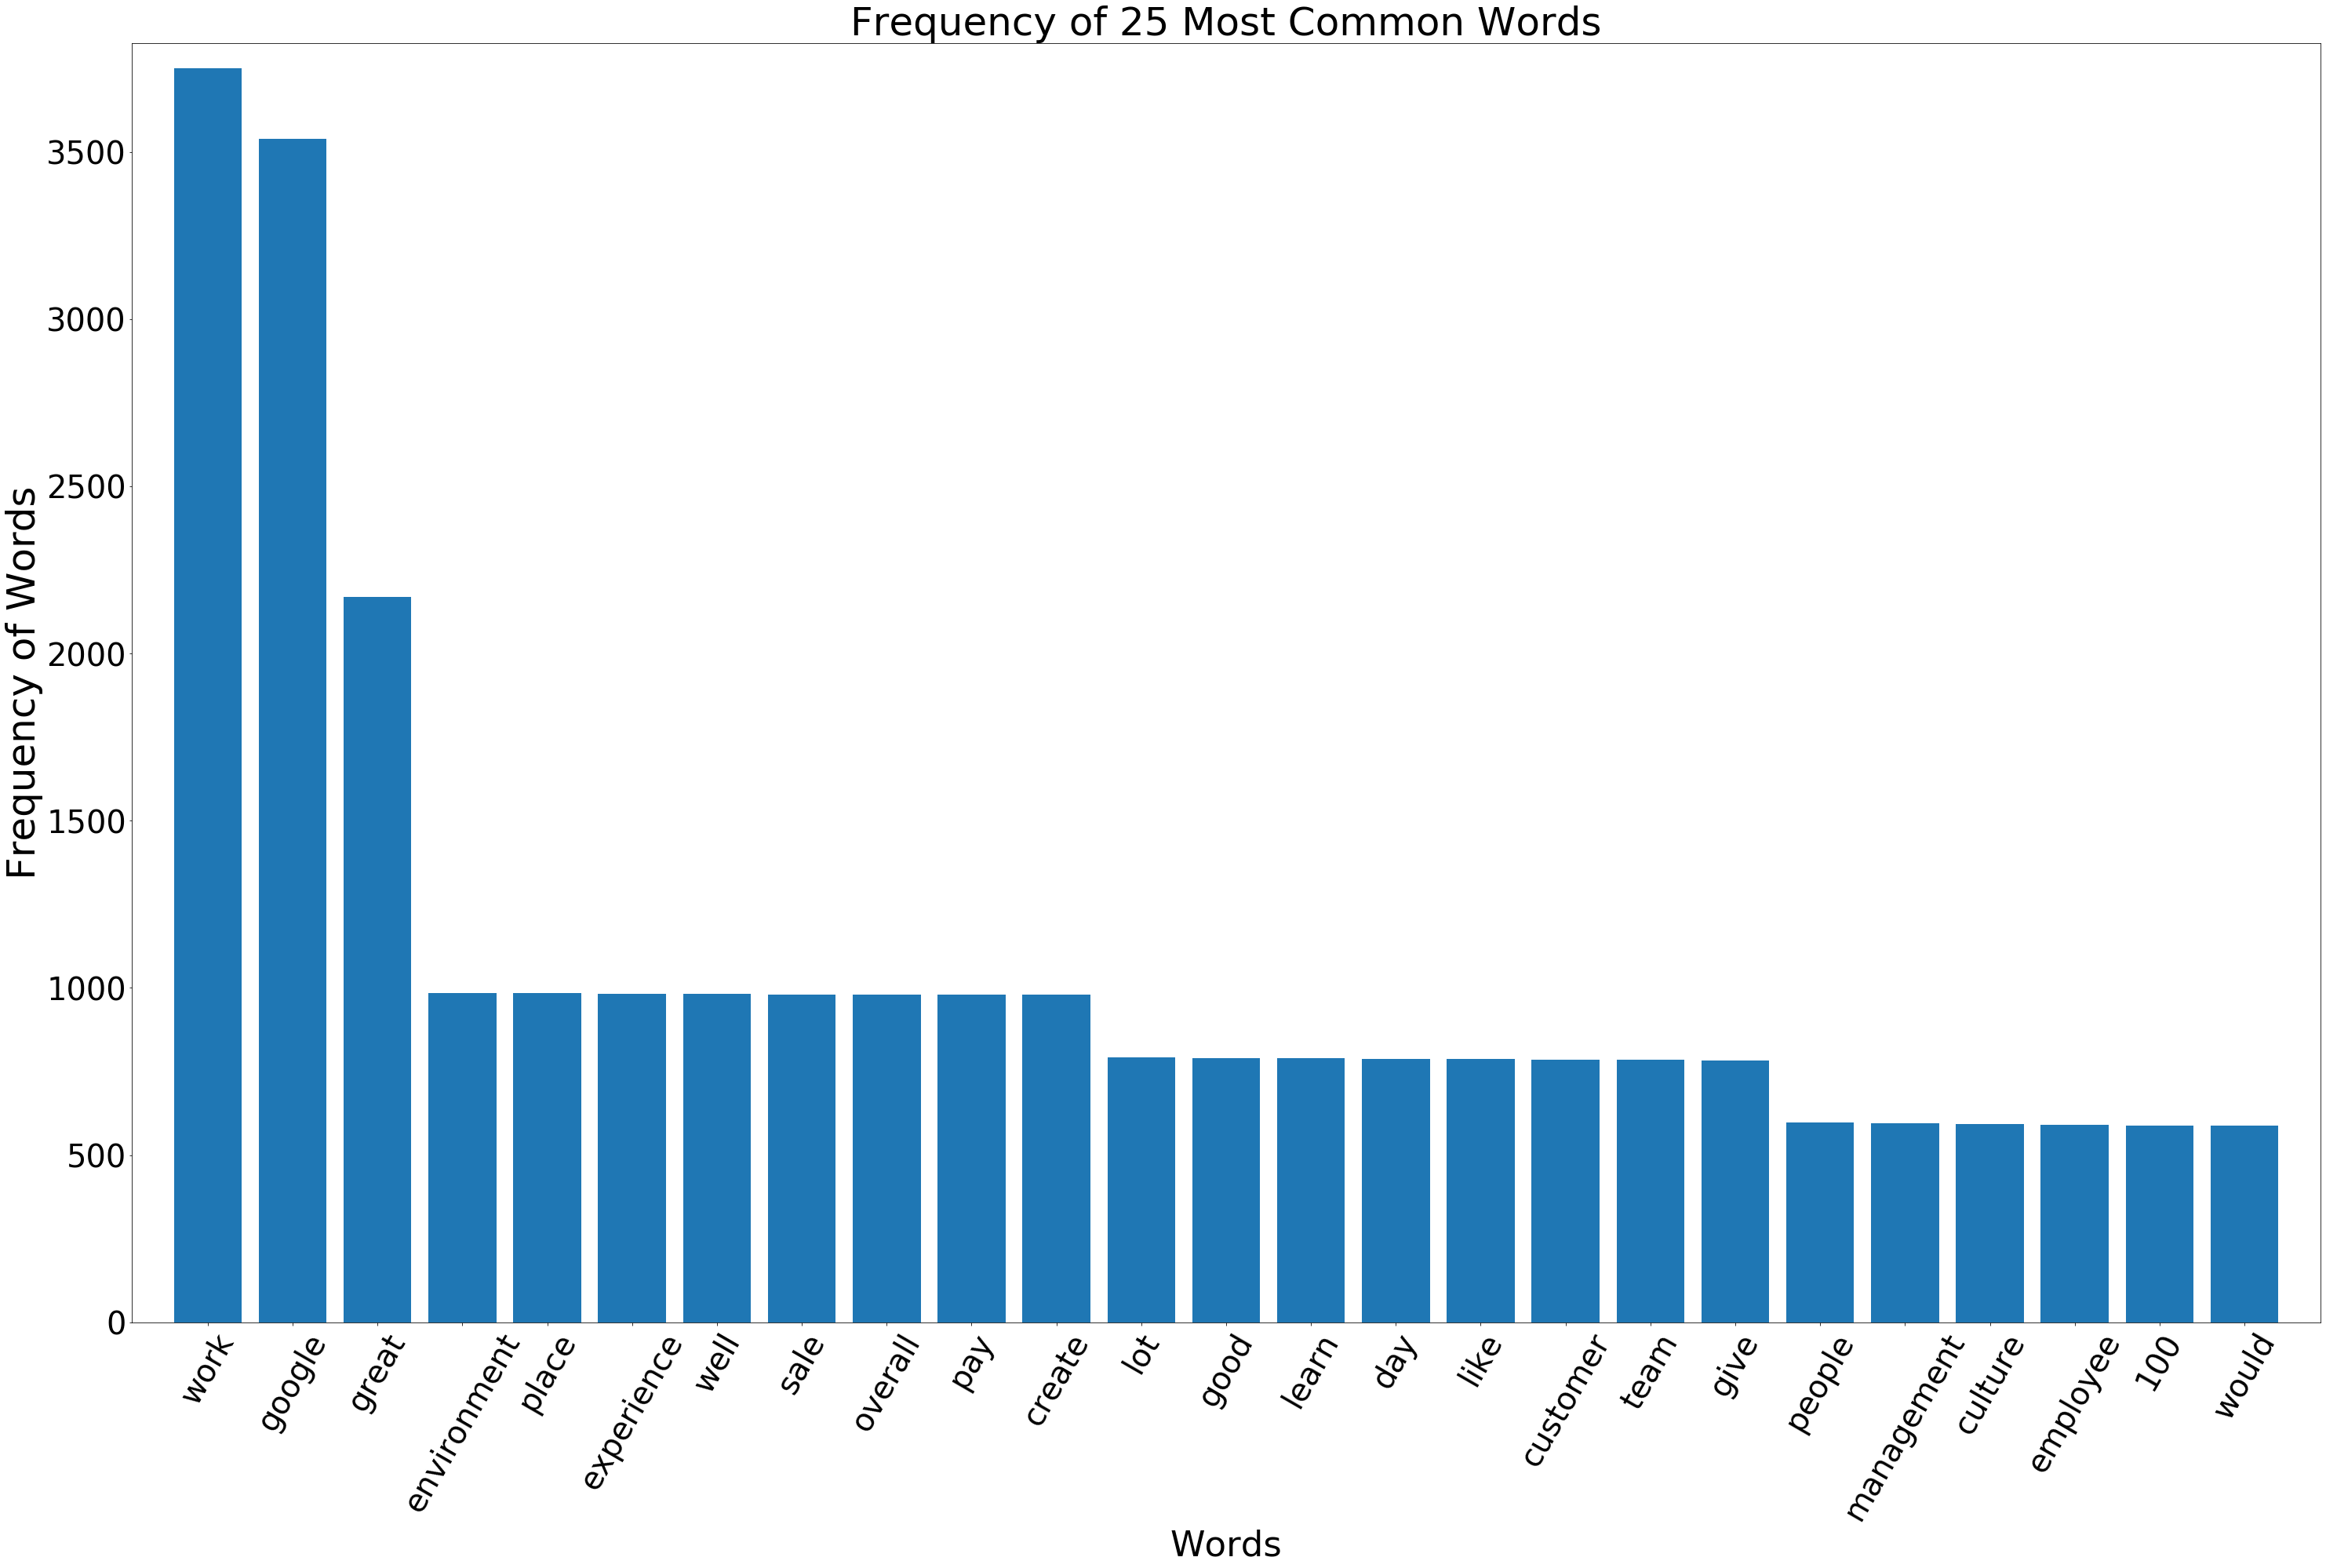

In [19]:
mostcommon_small=FreqDist(allwords).most_common(25)
x,y=zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x,y)
plt.title('Frequency of 25 Most Common Words',fontsize=50)
plt.xlabel('Words',fontsize=45)
plt.xticks(rotation=60,fontsize=40)
plt.ylabel('Frequency of Words',fontsize=50)
plt.yticks(fontsize=40)
plt.show()

In [20]:
group_by=df.groupby('rating')['lemma_str'].apply(lambda x: Counter(''.join(x).split()).most_common(25))

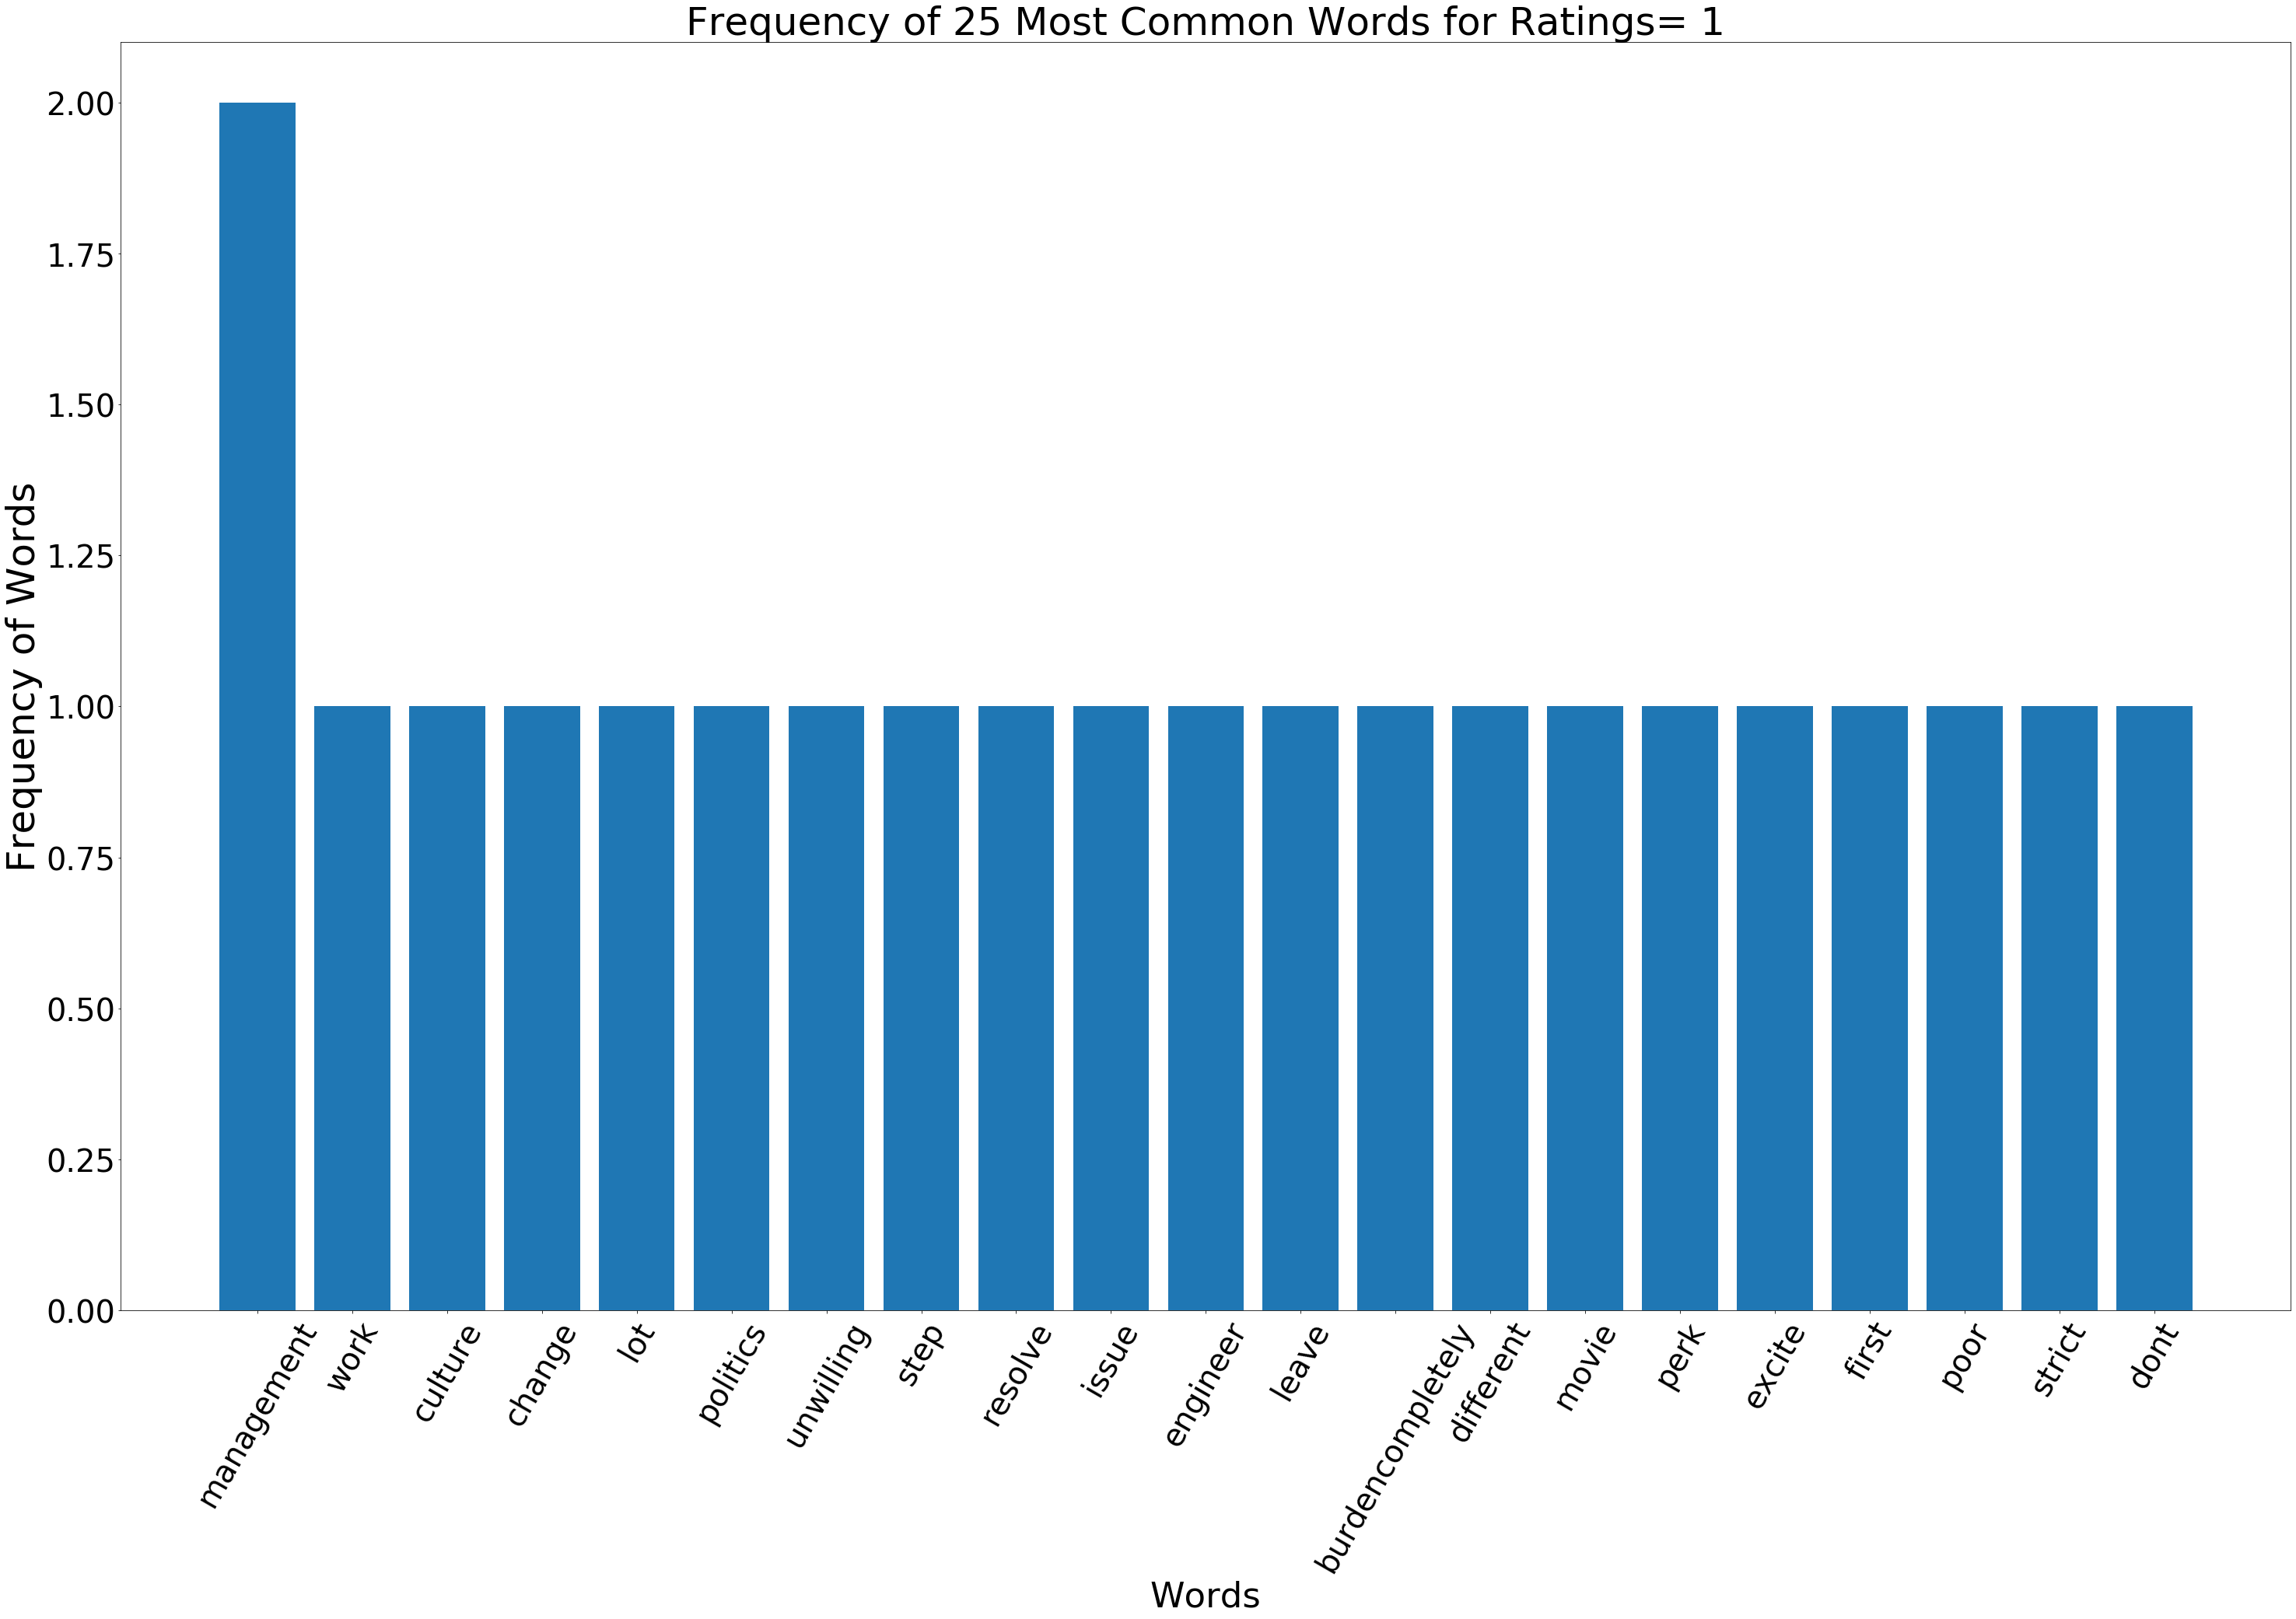

In [21]:
group_by_0 =  group_by.iloc[0]
words0=list(zip(*group_by_0))[0]
freq0=list(zip(*group_by_0))[1]
plt.figure(figsize=(50,30))

plt.bar(words0,freq0)
plt.title('Frequency of 25 Most Common Words for Ratings= 1',fontsize=50)
plt.xlabel('Words',fontsize=45)
plt.xticks(rotation=60,fontsize=40)
plt.ylabel('Frequency of Words',fontsize=50)
plt.yticks(fontsize=40)
plt.show()

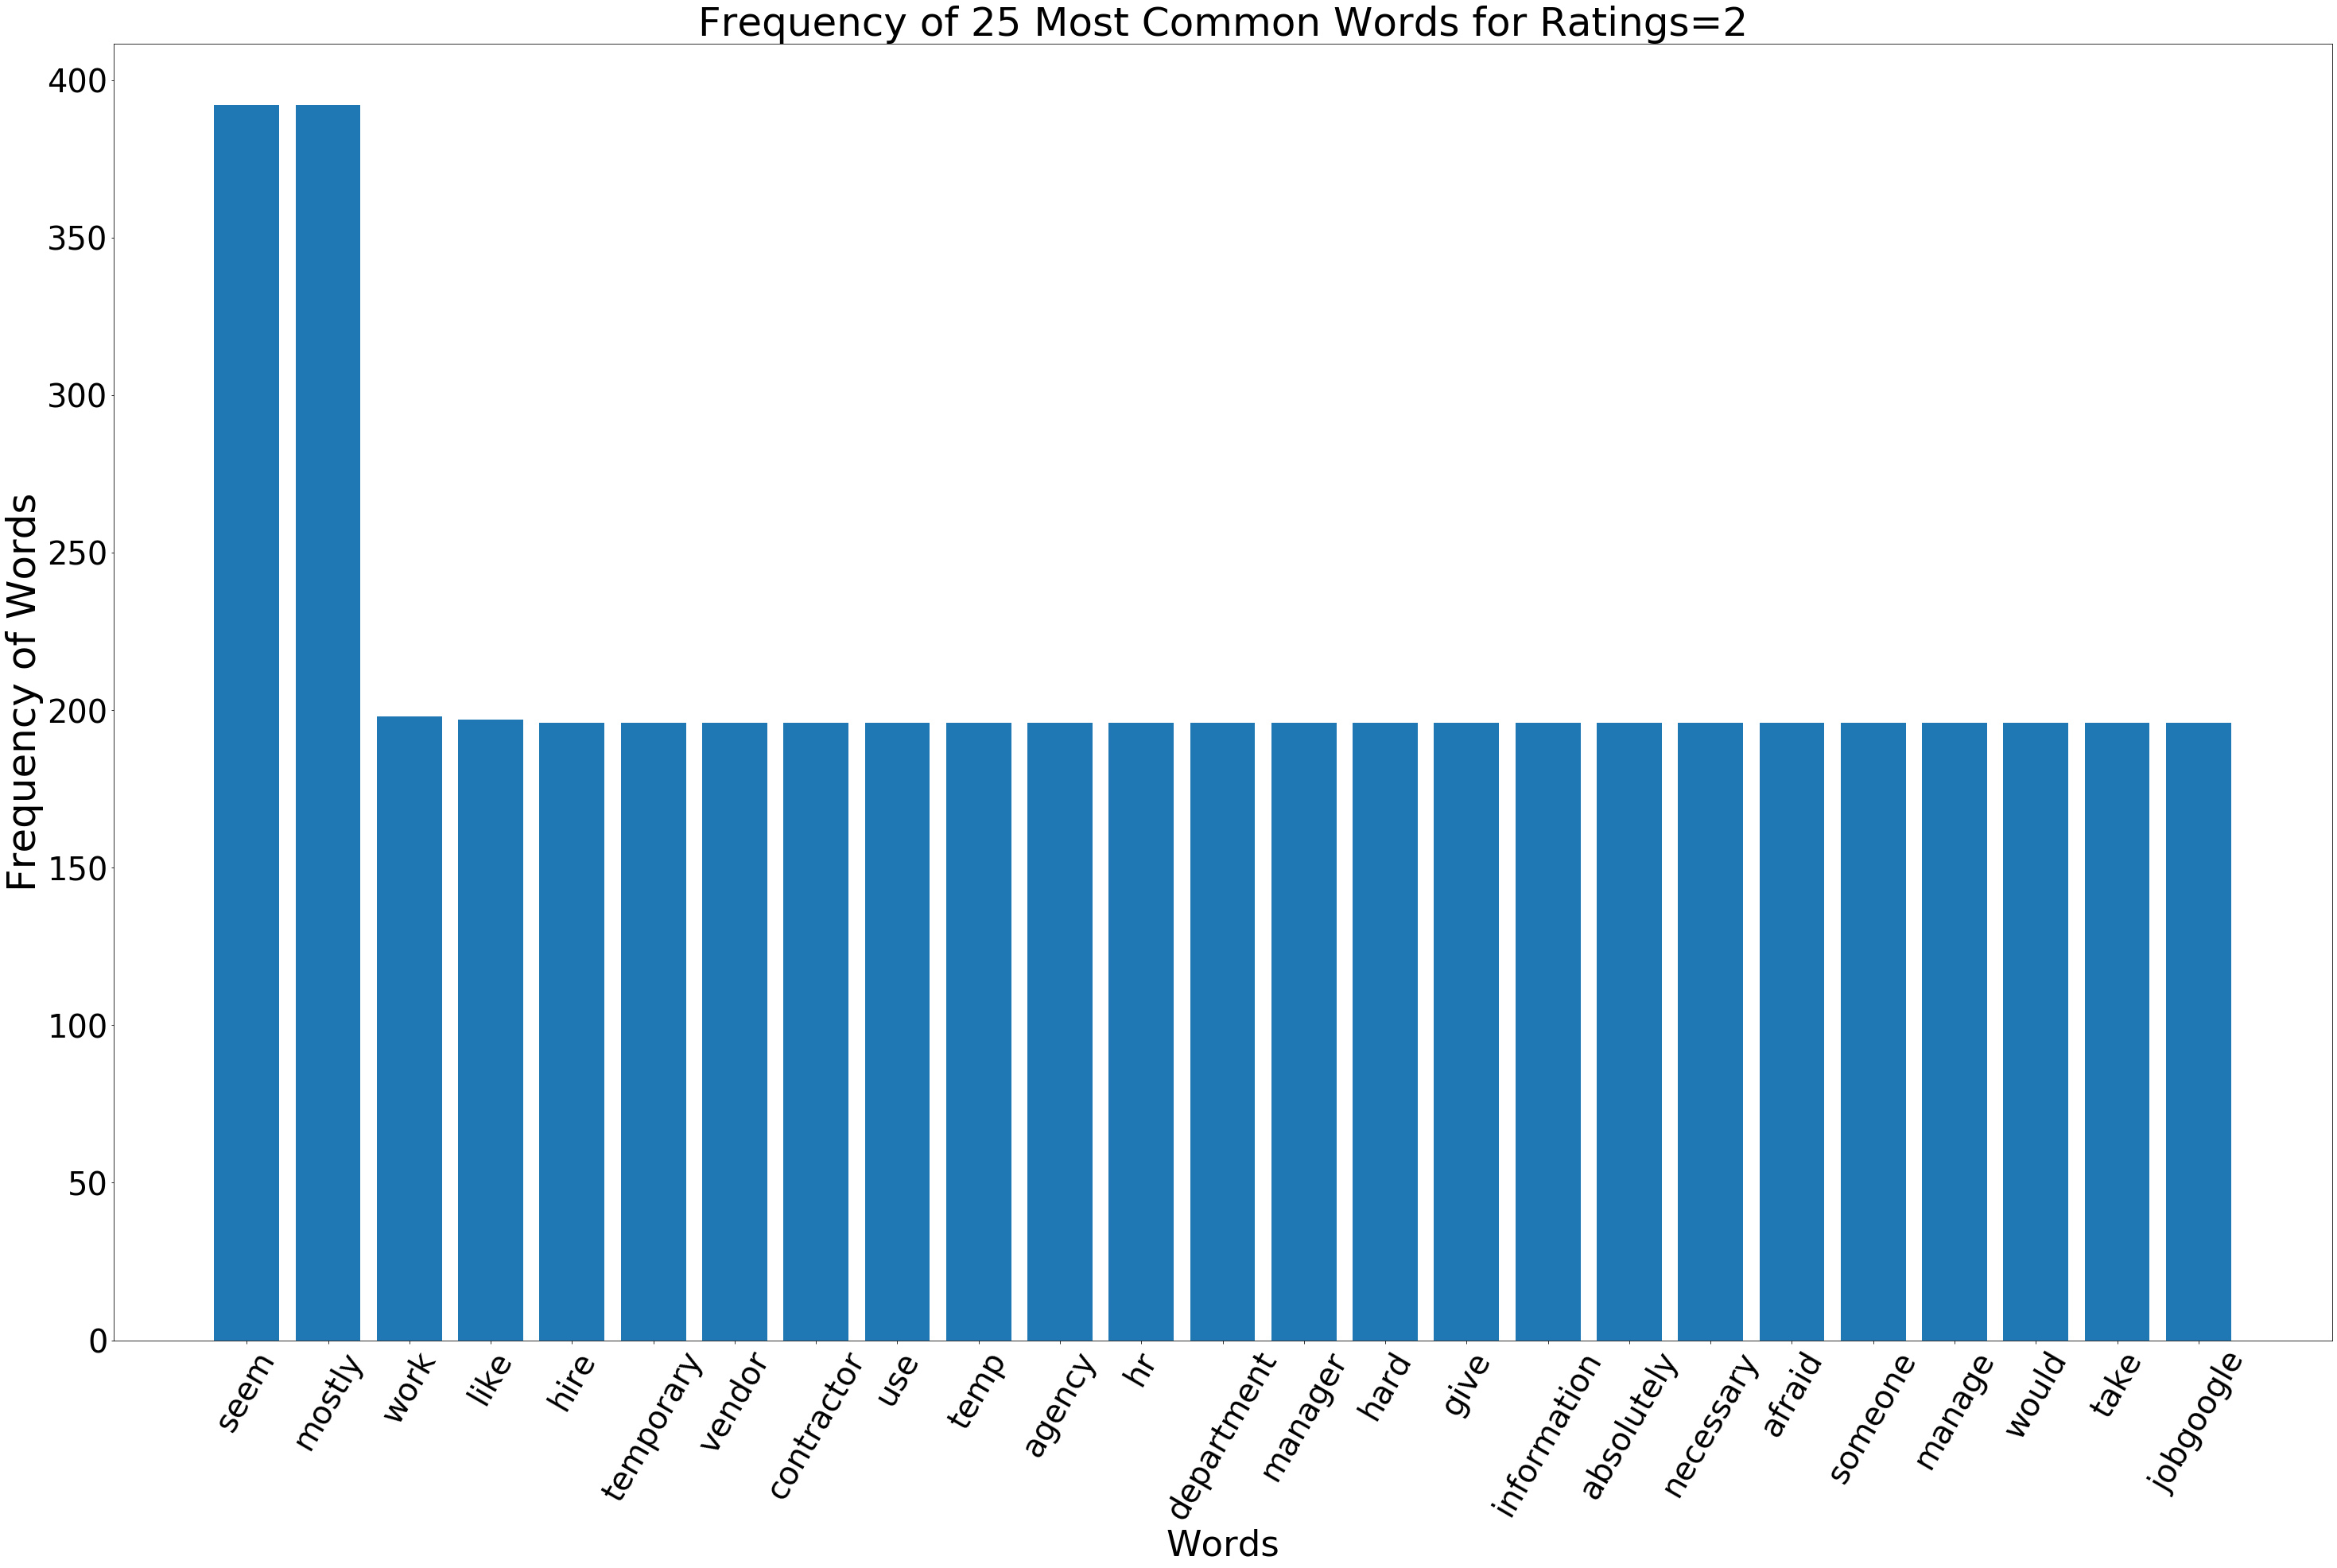

In [22]:
group_by_1 =  group_by.iloc[1]
words1=list(zip(*group_by_1))[0]
freq1=list(zip(*group_by_1))[1]
plt.figure(figsize=(50,30))

plt.bar(words1,freq1)
plt.title('Frequency of 25 Most Common Words for Ratings=2',fontsize=50)
plt.xlabel('Words',fontsize=45)
plt.xticks(rotation=60,fontsize=40)
plt.ylabel('Frequency of Words',fontsize=50)
plt.yticks(fontsize=40)
plt.show()

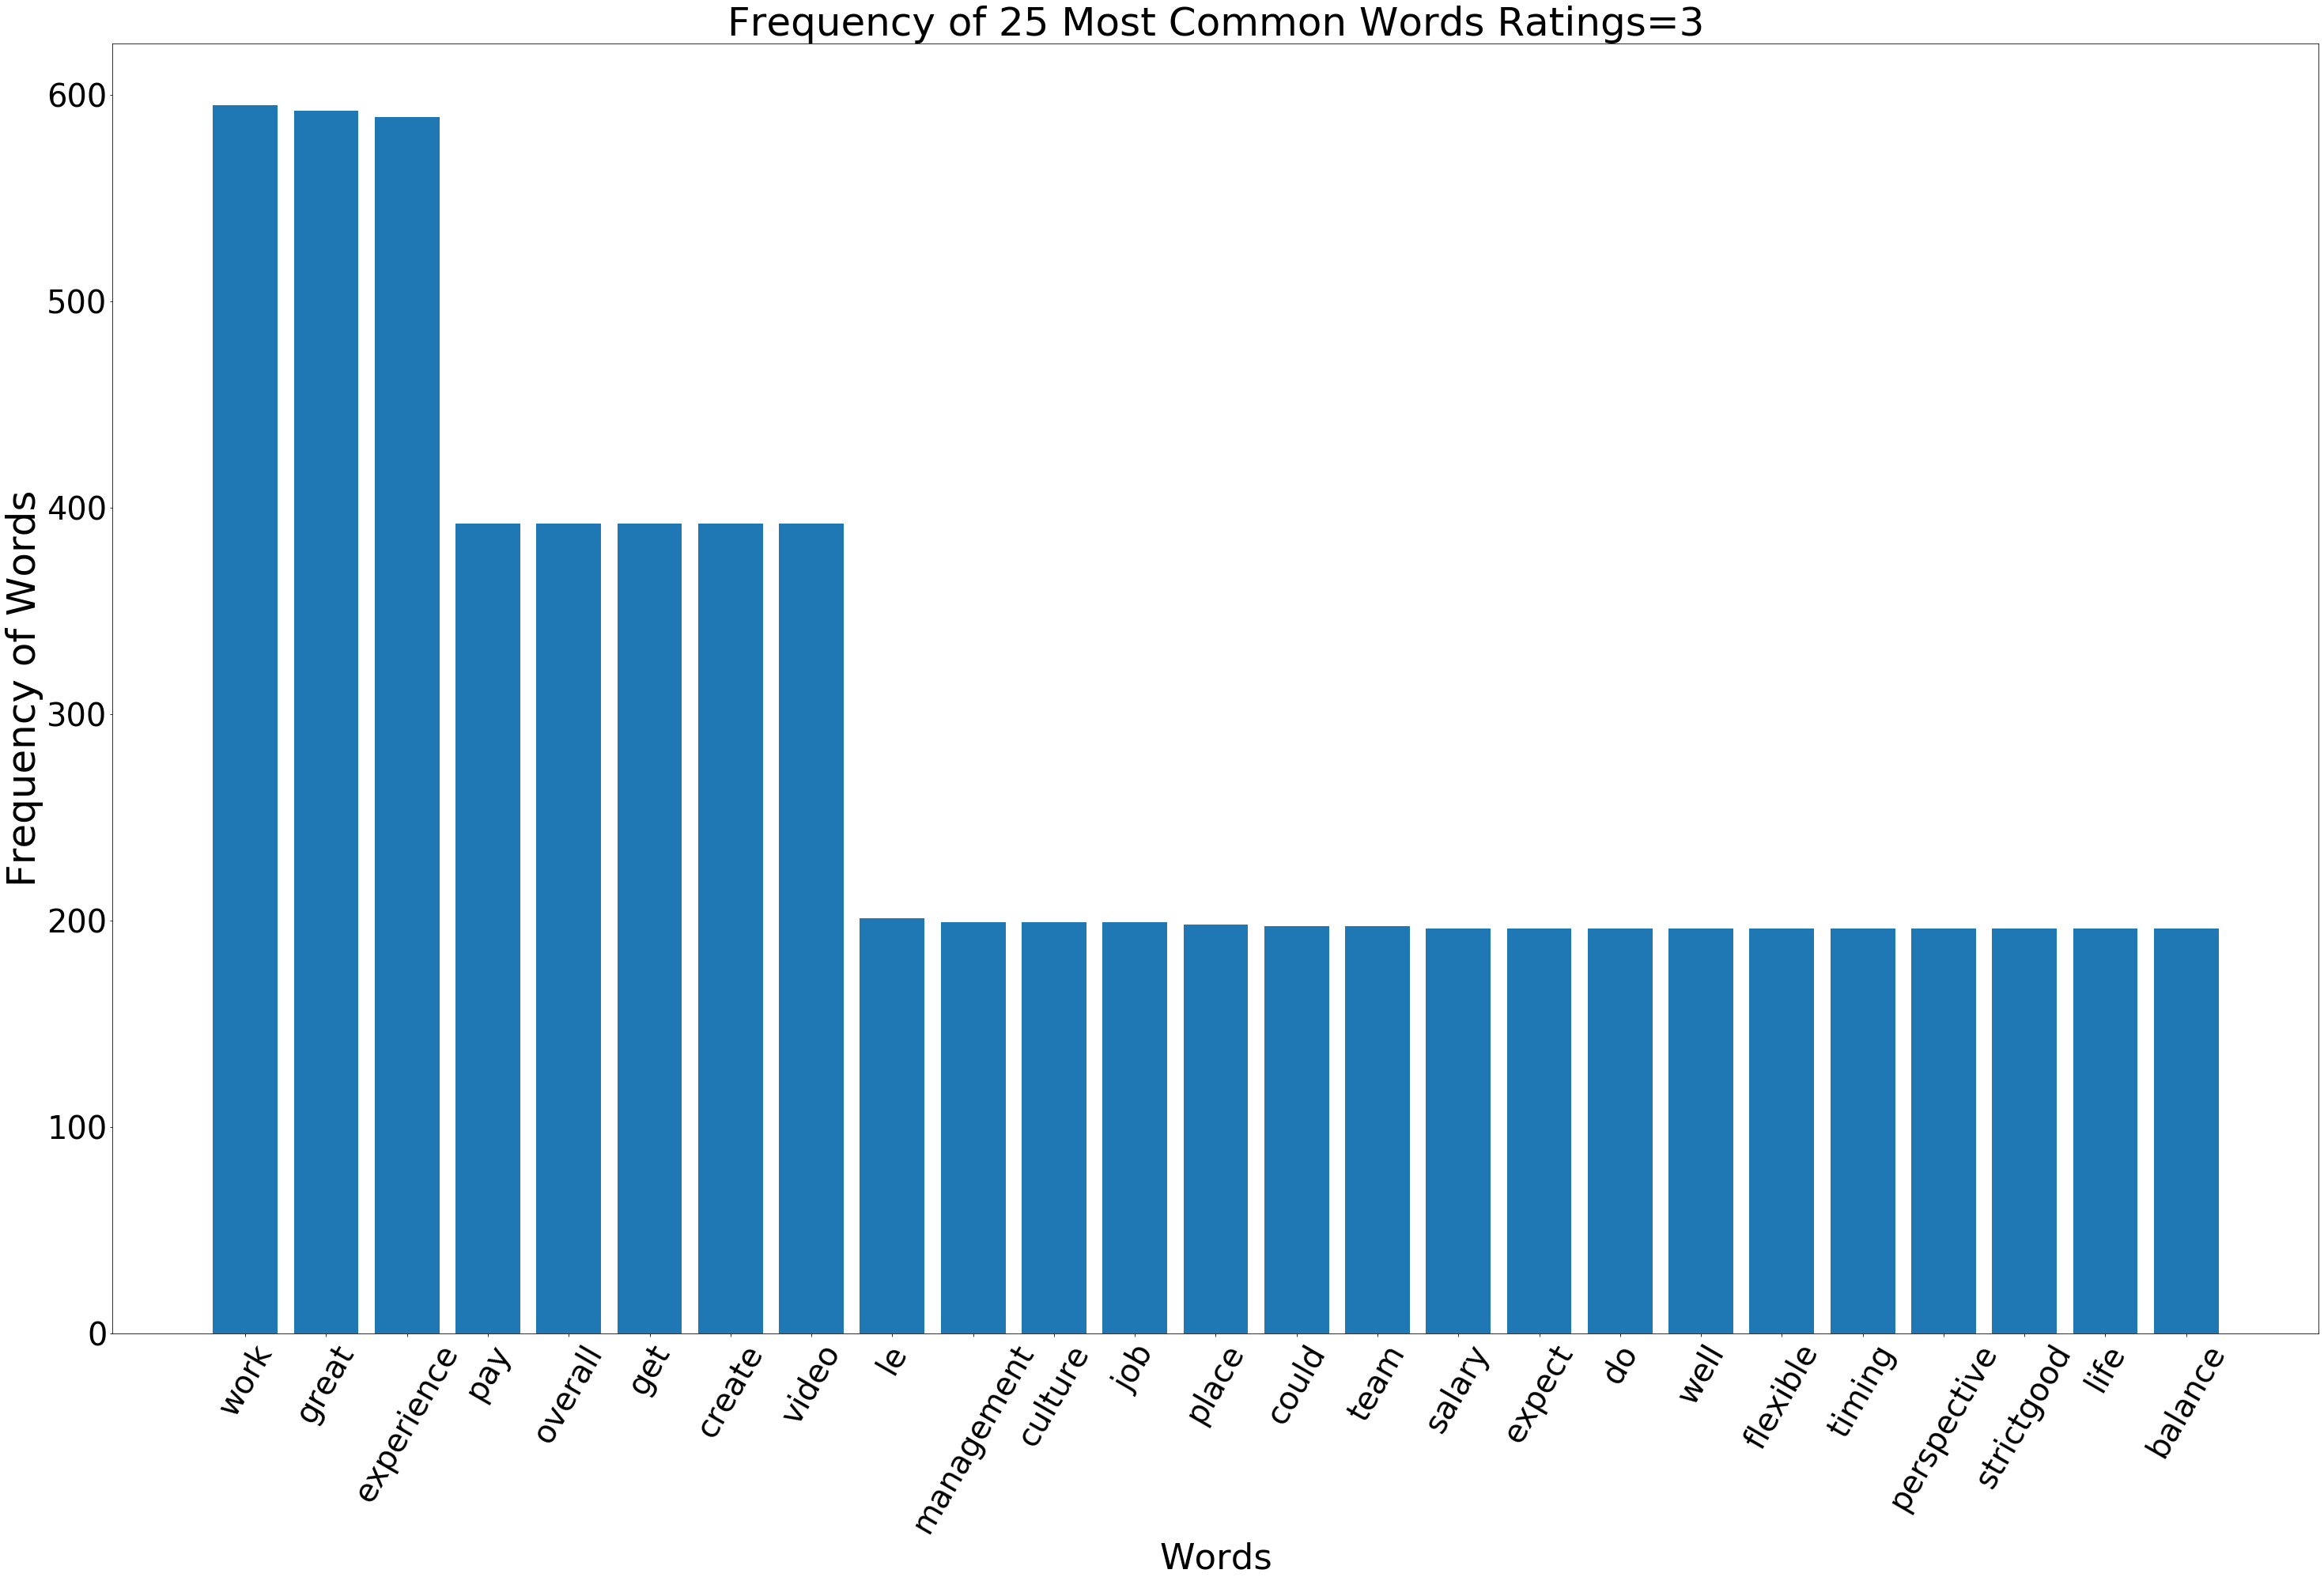

In [23]:
group_by_2 =  group_by.iloc[2]
words2=list(zip(*group_by_2))[0]
freq2=list(zip(*group_by_2))[1]
plt.figure(figsize=(50,30))

plt.bar(words2,freq2)
plt.title('Frequency of 25 Most Common Words Ratings=3',fontsize=50)
plt.xlabel('Words',fontsize=45)
plt.xticks(rotation=60,fontsize=40)
plt.ylabel('Frequency of Words',fontsize=50)
plt.yticks(fontsize=40)
plt.show()

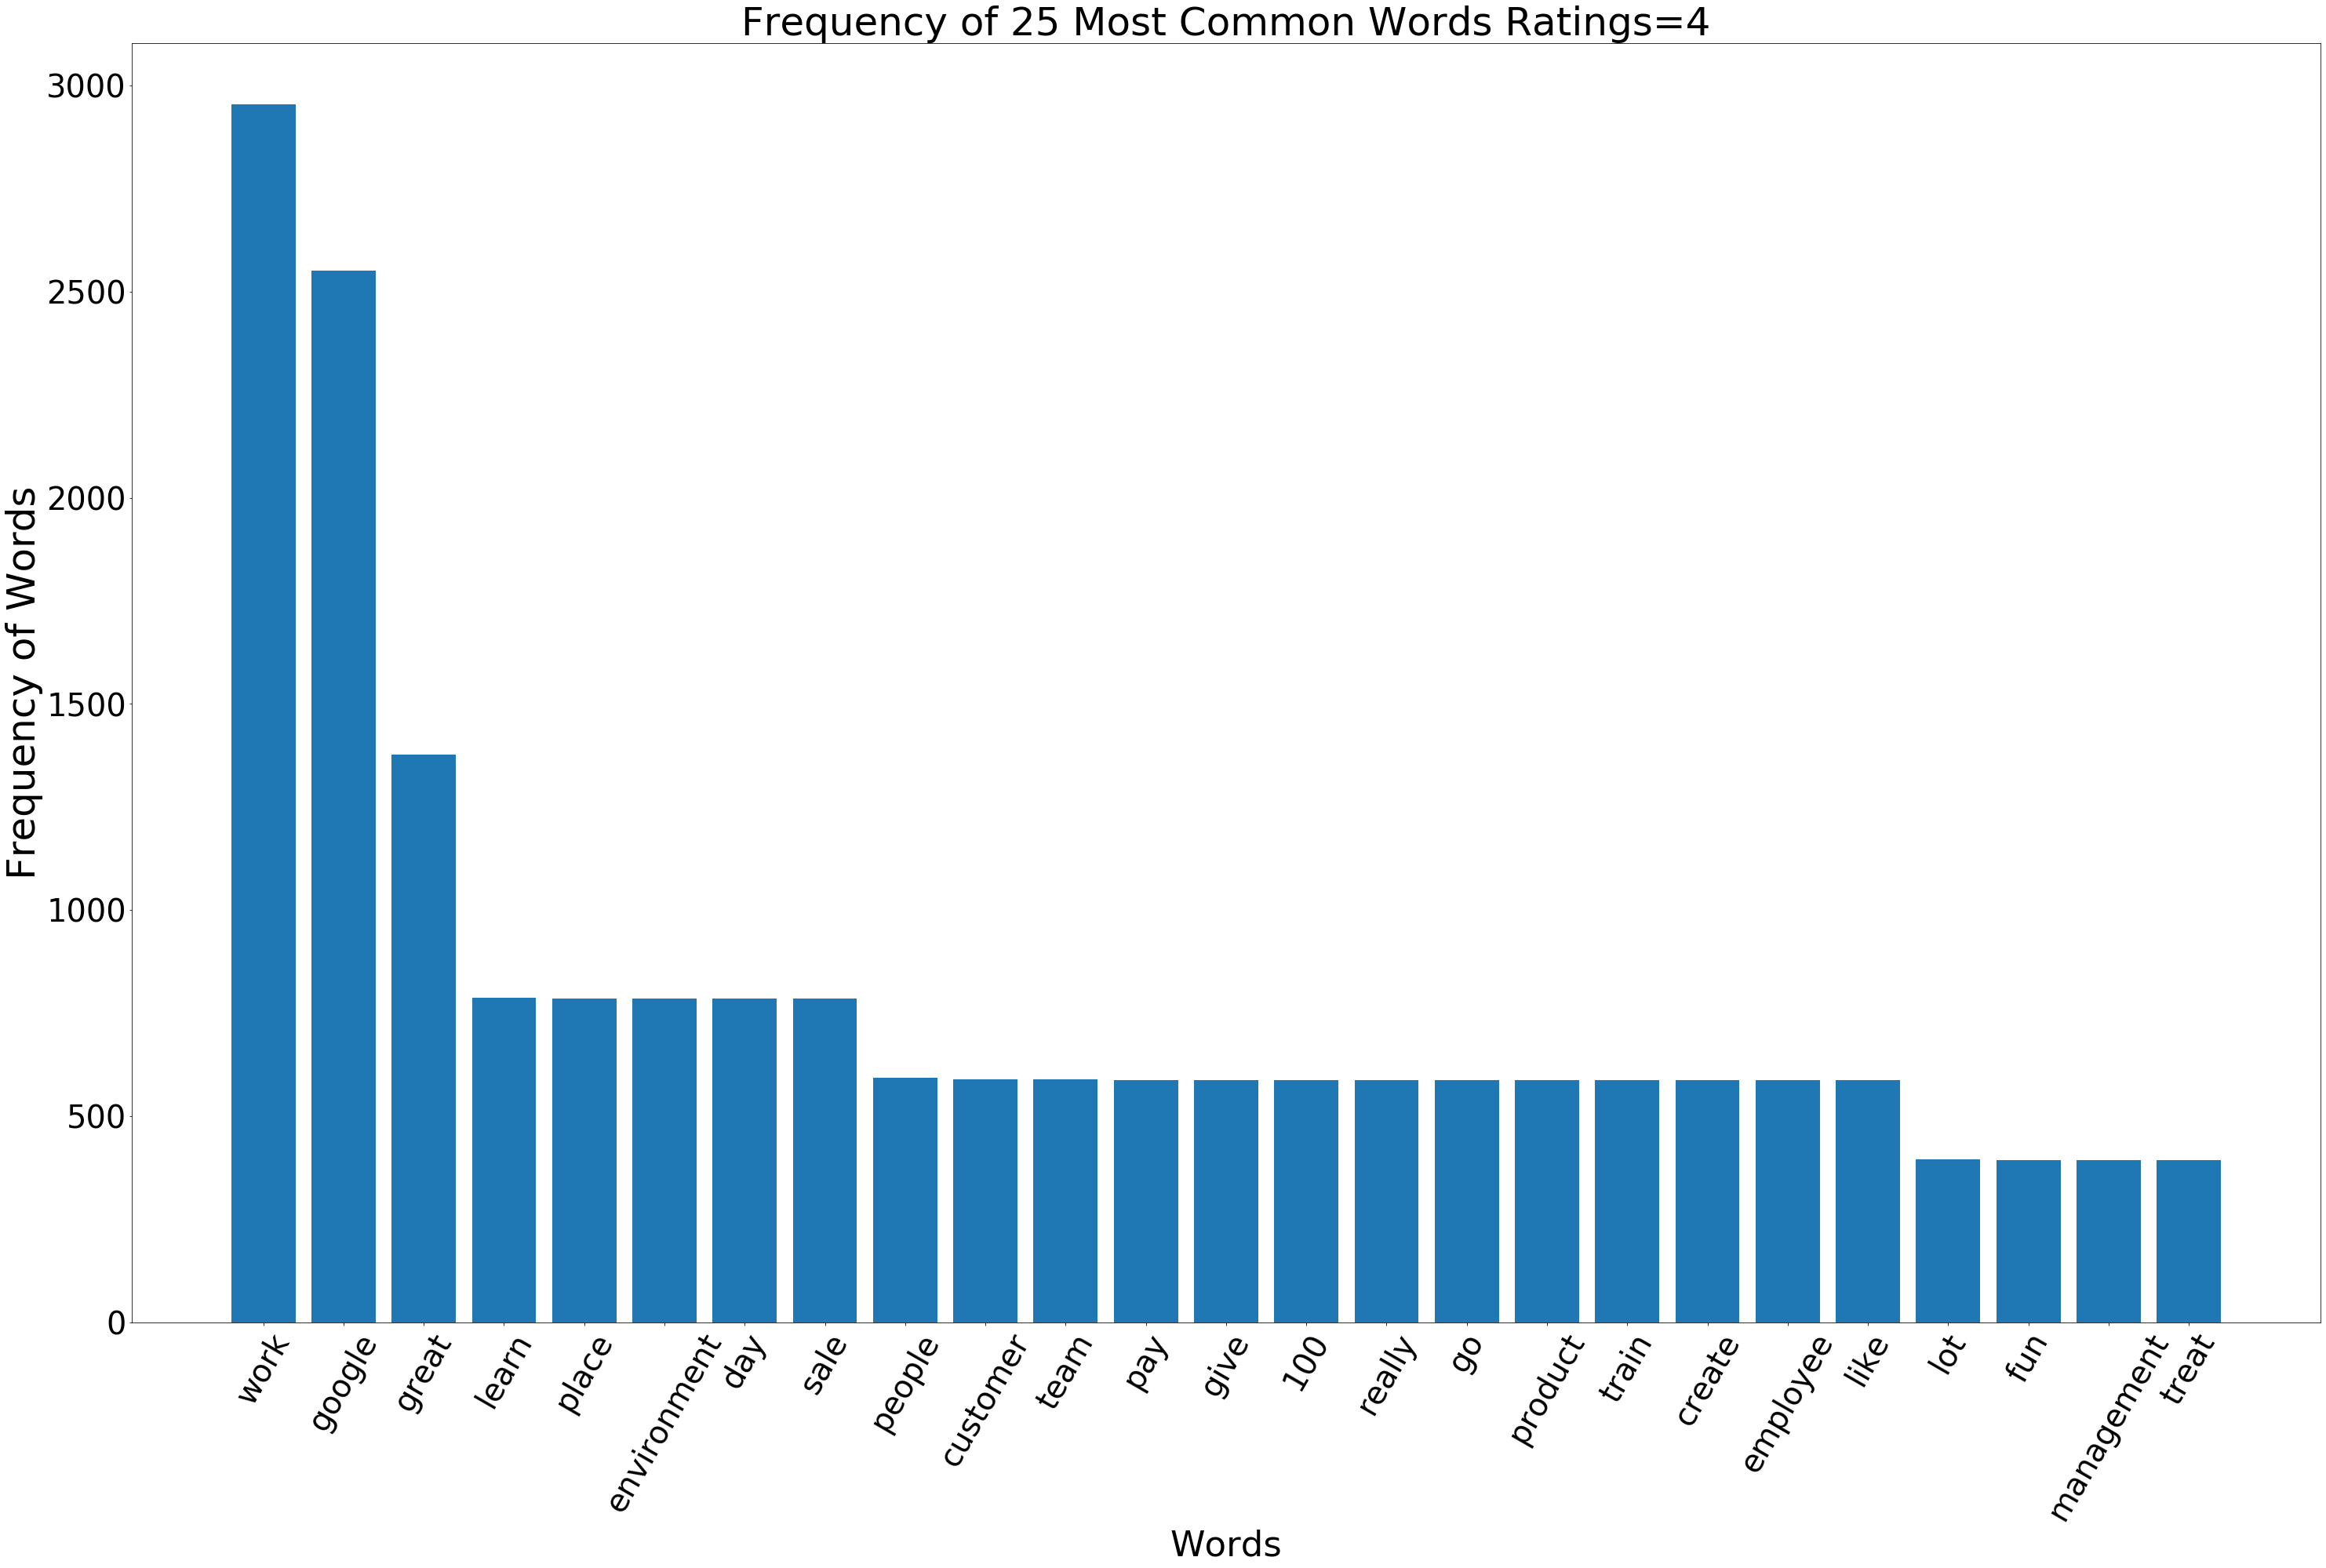

In [24]:
group_by_3 =  group_by.iloc[3]
words3=list(zip(*group_by_3))[0]
freq3=list(zip(*group_by_3))[1]
plt.figure(figsize=(50,30))

plt.bar(words3,freq3)
plt.title('Frequency of 25 Most Common Words Ratings=4',fontsize=50)
plt.xlabel('Words',fontsize=45)
plt.xticks(rotation=60,fontsize=40)
plt.ylabel('Frequency of Words',fontsize=50)
plt.yticks(fontsize=40)
plt.show()